In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
# pyplot is used to display plot on the screen 
import matplotlib.pyplot as plt

%matplotlib inline
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [45]:
# df = pd.read_csv('OnlineRetail.csv')
df = pd.read_excel('Online Retail.xlsx')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [46]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


2. Thực hiện các thao tác: cắt bỏ các ký tự thừa ở tên mặt hàng mua (cột Description),
xóa các dòng dữ liệu không có số hóa đơn (cột InvoiceNo) và chuyển nó về kiểu dữ
liệu chuỗi.

In [49]:
# Remove leading and trailing characters.
df['Description']=df['Description'].str.strip()

# Return a new Series with missing values removed.
df.dropna(axis=0, subset=['InvoiceNo'], inplace=True)

# Cast a pandas object to a specified dtype
df['InvoiceNo'] = df['InvoiceNo'].astype('str')

In [50]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


3. Có thể xem một ví dụ về loại hóa đơn tín dụng bằng câu lệnh như sau

In [51]:
# contains(): Test if pattern or regex is contained within a string of a Series or Index.

# Return boolean Series or Index based on 
# whether a given pattern or regex is contained within a string 
# of a Series or Index.
check = df['InvoiceNo'].str.contains('c', na=False).head(10)
print(check)

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9    False
Name: InvoiceNo, dtype: bool


Tiến hành xóa những hóa đơn tín dụng

In [52]:
# df['InvoiceNo'].str.contains('c'): This checks whether each value in the 'InvoiceNo' column contains the string 'c'. 
# The result is a boolean Series where True indicates that the corresponding value in 'InvoiceNo' contains the string 'c', 
# and False indicates that it does not.

# ~df['InvoiceNo'].str.contains('c'): The tilde (~) operator is a unary operator that performs element-wise negation of a boolean Series. 
# In this case, it negates the boolean Series from step 1, so that False becomes True, and vice versa. 
# The resulting boolean Series contains True where the corresponding value in 'InvoiceNo' does not contain the string 'c', and False where it does.

# df[~df['InvoiceNo'].str.contains('c')]: This uses the boolean Series from step 2 as a filter on the original DataFrame df. 
# It selects only the rows where the corresponding value in 'InvoiceNo' does not contain the string 'c'.

df = df[~df['InvoiceNo'].str.contains('c')]

4. Thống kê số dòng dữ liệu theo từng quốc gia, bằng câu lệnh sau

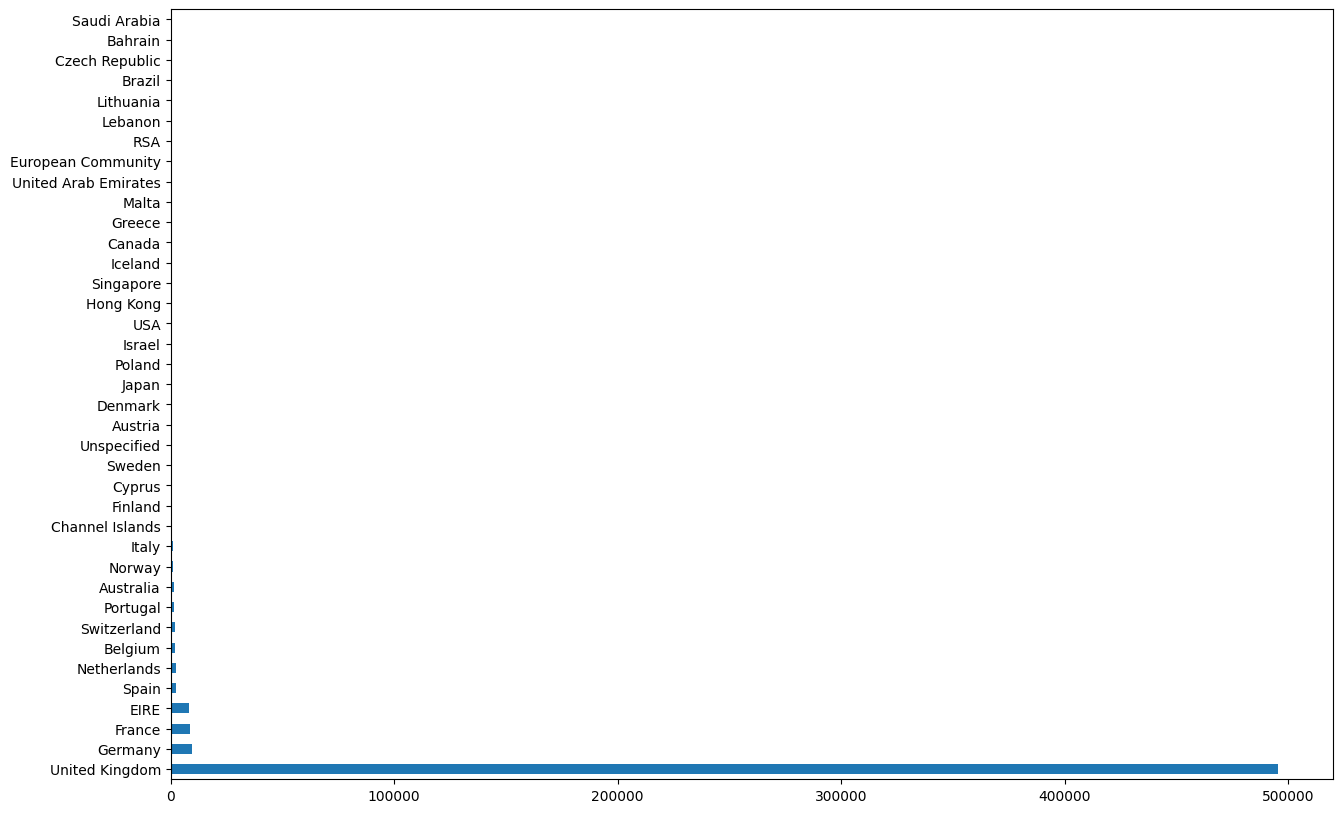

In [53]:
df['Country'].value_counts().plot(kind='barh', figsize=(15,10))
plt.show()

5. Lấy ra dữ liệu hóa đơn từ nước Anh ‘United Kingdom’ và gom nhóm cột Số lượng
mua (Quantity) theo Số hóa đơn (InvoiceNo) và Tên mặt hàng (Description).

In [54]:
# .groupby(['InvoiceNo','Description']): This groups the selected rows by two columns, 'InvoiceNo' and 'Description'. 
# This creates a new DataFrame where each row represents a unique combination of 'InvoiceNo' and 'Description',
# and the values in each row are aggregated based on the aggregation function used (in this case, 'Quantity').
basket = df[df['Country'] == "United Kingdom"].groupby(['InvoiceNo','Description'])['Quantity']

6. Chuyển đổi dữ liệu về dạng hot encoding, với mỗi dòng dữ liệu là một hóa đơn

In [55]:
# sum(): This calculates the sum of the values in the basket Series. Since basket is a grouped Pandas Series, 
# the sum is calculated for each group of rows, where each group represents a unique combination of 'InvoiceNo' and 'Description'.

# .unstack(): This pivots the basket Series so that each unique value in the 'Description' column becomes a separate column in the resulting DataFrame.
# The 'InvoiceNo' column becomes the index of the resulting DataFrame.

# .reset_index(): This resets the index of the DataFrame so that the 'InvoiceNo' column becomes a regular column.

# .fillna(0): This replaces any missing values (NaNs) in the DataFrame with 0.

# .set_index('InvoiceNo'): This sets the 'InvoiceNo' column as the index of the DataFrame.
basket = basket.sum().unstack().reset_index().fillna(0).set_index('InvoiceNo')

So overall, the code calculates the sum of the 'Quantity' values for each unique combination of 'InvoiceNo' and 'Description' in the original DataFrame, pivots the resulting Series so that each unique 'Description' becomes a separate column, fills any missing values with 0, and sets the 'InvoiceNo' column as the index of the resulting DataFrame. The resulting DataFrame is assigned to the variable 'basket'.

7. Tạo hàm biến đổi mỗi điểm dữ liệu có số lượng (Quantity) lớn hơn 0 thành 1

In [56]:
def encode_data(datapoint):
  if datapoint <= 0:
    return 0
  if datapoint >= 1:
    return 1

Chuyển đổi dữ liệu từ dạng hot encoding thành one-hot encoding

In [57]:
basket = basket.applymap(encode_data)

8. Do cột ‘POSTAGE’ là tiền cước phí trên mỗi hóa đơn nên cần xóa nó đi.

In [58]:
basket.drop('POSTAGE', inplace = True, axis =1)

9. Áp dụng thuật toán Apriori với min_sup = 3% để tìm tập phổ biến

In [59]:
itemsets = apriori(basket, min_support=0.03, use_colnames=True)

/home/hieu/miniconda3/lib/python3.10/site-packages/mlxtend/frequent_patterns/fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [60]:
itemsets.head(10)

,support,itemsets
0,0.038795,(6 RIBBONS RUSTIC CHARM)
1,0.034167,(60 TEATIME FAIRY CAKE CASES)
2,0.039748,(ALARM CLOCK BAKELIKE GREEN)
3,0.042198,(ALARM CLOCK BAKELIKE RED)
4,0.030673,(ANTIQUE SILVER T-LIGHT GLASS)
5,0.062208,(ASSORTED COLOUR BIRD ORNAMENT)
6,0.035800,(BAKING SET 9 PIECE RETROSPOT)
7,0.030582,(CHARLOTTE BAG PINK POLKADOT)
8,0.036481,(CHARLOTTE BAG SUKI DESIGN)
9,0.037207,(CHOCOLATE HOT WATER BOTTLE)


10. Tạo luật kết hợp với min_conf = 50% và in ra các luật này.

In [61]:
rules = association_rules(itemsets, metric = "confidence", min_threshold=0.5)

In [62]:
rules.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   antecedents         4 non-null      object 
 1   consequents         4 non-null      object 
 2   antecedent support  4 non-null      float64
 3   consequent support  4 non-null      float64
 4   support             4 non-null      float64
 5   confidence          4 non-null      float64
 6   lift                4 non-null      float64
 7   leverage            4 non-null      float64
 8   conviction          4 non-null      float64
dtypes: float64(7), object(2)
memory usage: 416.0+ bytes


Chuyển đổi vế trái và vế phải từ kiểu object (frozenset) về kiểu chuỗi (unicode)

In [63]:
rules['antecedents'] = rules['antecedents'].apply(lambda x: list(x)[0]).astype("unicode")
rules['consequents'] = rules['consequents'].apply(lambda x: list(x)[0]).astype("unicode")
print(rules['antecedents'], "\n")
print(rules['consequents'])

0    ROSES REGENCY TEACUP AND SAUCER
1    GREEN REGENCY TEACUP AND SAUCER
2            JUMBO BAG PINK POLKADOT
3             JUMBO STORAGE BAG SUKI
Name: antecedents, dtype: object 

0    GREEN REGENCY TEACUP AND SAUCER
1    ROSES REGENCY TEACUP AND SAUCER
2            JUMBO BAG RED RETROSPOT
3            JUMBO BAG RED RETROSPOT
Name: consequents, dtype: object


The association_rules function from the mlxtend library generates association rules between items in a dataset based on a given metric (e.g. support, confidence, lift). The output of this function is a Pandas DataFrame containing the association rules and their corresponding metrics, including the antecedents and consequents of each rule. In the rules DataFrame, the antecedents column contains sets of items that are the conditions of the rule.

However, the sets of items in the antecedents column are in the form of frozensets, which do not support indexing. Therefore, this code uses a lambda function to convert each frozenset into a list, selects the first element of the list (i.e. the first item in the set), and then converts it to a Unicode string. The resulting column is a series of Unicode strings representing the first item in each set of 'antecedents', which can be more easily manipulated and analyzed than frozensets.

Overall, this code is transforming the output of the association_rules function to make it more convenient for further analysis or visualization.

Viết lệnh in ra các luật đã tìm được

for i in range(len(rules)):: This creates a loop that iterates over each row of the DataFrame rules, where len(rules) returns the number of rows in the DataFrame.

rules.loc[i, 'antecedents']: This accesses the value in the 'antecedents' column of the DataFrame rules at the ith row, where i is the current iteration of the loop.

rules.loc[i, 'consequents']: This accesses the value in the 'consequents' column of the DataFrame rules at the ith row.

rules.loc[i, 'support']: This accesses the value in the 'support' column of the DataFrame rules at the ith row.

rules.loc[i, 'confidence']: This accesses the value in the 'confidence' column of the DataFrame rules at the ith row.

print(...): This prints out a formatted string containing the antecedents, consequents, support, and confidence metrics for the current association rule.

So overall, the code iterates over each row of the DataFrame rules and prints out the antecedents, consequents, support, and confidence metrics for each association rule. This can be used to inspect the generated association rules and to identify interesting patterns in the data.

In [64]:
for i in range(len(rules)):
  print(rules.loc[i, 'antecedents'], '==>', rules.loc[i, 'consequents'],' [', rules.loc[i,'support'], ', ', rules.loc[i, 'confidence'], ']'  )

ROSES REGENCY TEACUP AND SAUCER ==> GREEN REGENCY TEACUP AND SAUCER  [ 0.03180725078270339 ,  0.7324973876698015 ]
GREEN REGENCY TEACUP AND SAUCER ==> ROSES REGENCY TEACUP AND SAUCER  [ 0.03180725078270339 ,  0.7505353319057817 ]
JUMBO BAG PINK POLKADOT ==> JUMBO BAG RED RETROSPOT  [ 0.035618675983483825 ,  0.6773080241587576 ]
JUMBO STORAGE BAG SUKI ==> JUMBO BAG RED RETROSPOT  [ 0.03167112845410409 ,  0.6176991150442478 ]


11. Lấy giá trị độ hỗ trợ và độ tin cậy của tập luật

In [65]:
support = rules['support'].values
print(support)

confidence = rules['confidence'].values
print(confidence)

[0.03180725 0.03180725 0.03561868 0.03167113]
[0.73249739 0.75053533 0.67730802 0.61769912]


Biểu diễn độ tin cậy, độ hỗ trợ của tập luật lên đồ thị phân tán (scatter plot).

<Axes: title={'center': 'Association Rules'}, xlabel='support', ylabel='confidence'>

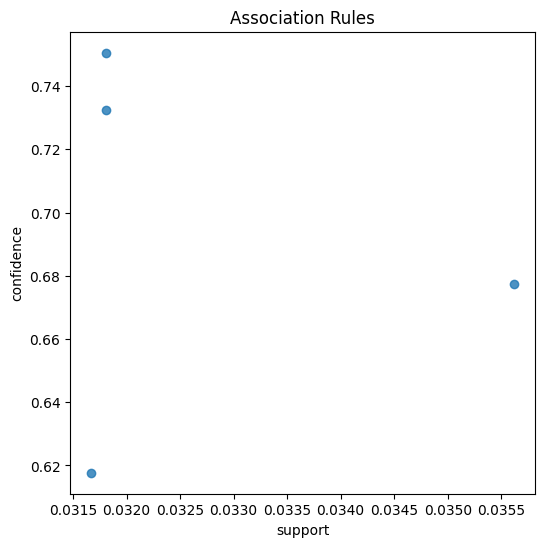

In [66]:
plt.figure(figsize=(6,6))
plt.title('Association Rules')
plt.xlabel('support')
plt.ylabel('confidence')
sns.regplot(x=support, y=confidence, fit_reg=False)

12. Tìm tập phổ biến và luật kết hợp bằng thuật toán FP-Growth với min_sup = 3%,
min_conf = 50%. So sánh kết quả với thuật toán Apriori ở trên.

In [67]:
from mlxtend.frequent_patterns import fpgrowth

itemsets = fpgrowth(basket, min_support=0.03, use_colnames=True)

/home/hieu/miniconda3/lib/python3.10/site-packages/mlxtend/frequent_patterns/fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
